#  Pizza Sales Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import  plotly.express as px

## Imprort dataset


In [2]:
# read the Excel file into a pandas DataFrame
df = pd.read_excel(r'H:\Project 2025\Python\Pizza sales\pizza_sales.xlsx', engine='openpyxl')

## Explore the dataset

In [3]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [4]:
df.shape

(48620, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


##  Data Types

In [6]:
df.dtypes

pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_date           datetime64[ns]
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
dtype: object

In [7]:
df.describe()

,pizza_id,order_id,quantity,order_date,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,2015-06-29 11:03:43.611682560,16.494132,16.821474
min,1.000000,1.000000,1.000000,2015-01-01 00:00:00,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,2015-03-31 00:00:00,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,2015-06-28 00:00:00,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,2015-09-28 00:00:00,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,2015-12-31 00:00:00,35.950000,83.000000
std,14035.529381,6180.119770,0.143077,NaN,3.621789,4.437398


## KPIs

In [8]:
total_revenue = df['total_price'].sum()
total_pizzas_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
average_order_value = total_revenue / total_orders
average_pizzas_per_order = total_pizzas_sold / total_orders

print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Pizzas Sold: {total_pizzas_sold:,}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: ${average_order_value:,.2f}")
print(f"Average Pizzas per Order: {average_pizzas_per_order:.2f}")

Total Revenue: $817,860.05
Total Pizzas Sold: 49,574
Total Orders: 21350
Average Order Value: $38.31
Average Pizzas per Order: 2.32


## Analysis and Visualization 

### Ingredient Analysis

In [9]:
Ingredient = (
    df['pizza_ingredients']
    .str.split(',')        # keep as lists so Series.explode() can be used
    .explode()
    .str.strip()
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'count', 'pizza_ingredients': 'ingredient'})
)
print(Ingredient.head(10))

          ingredient  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


### Daily Trend

#### Total order

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\2076550039.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_by_day.index, y=order_by_day.values, palette='viridis')


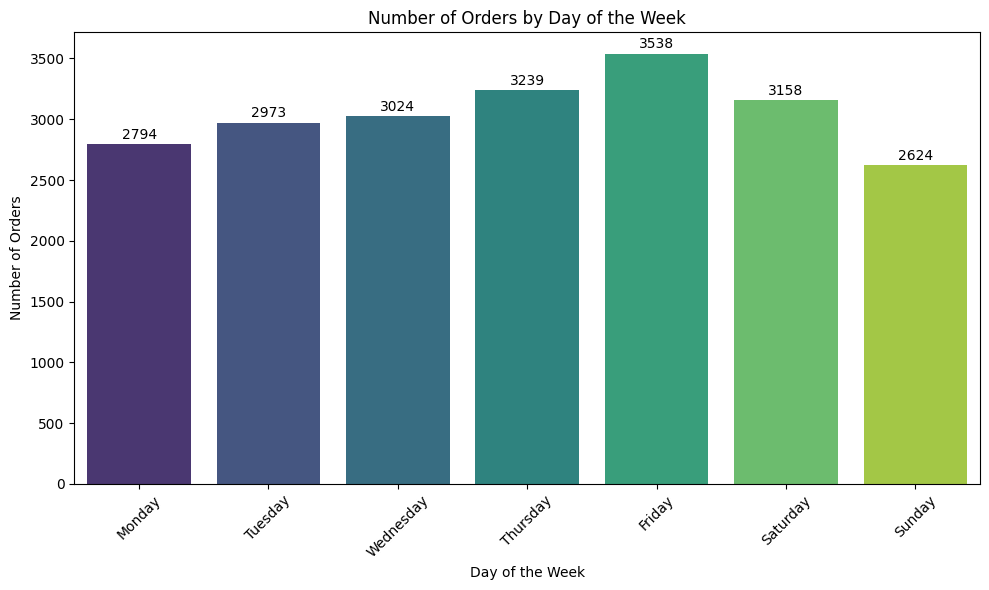

In [10]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()
weekdays_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=weekdays_ordered, ordered=True)

order_by_day = (
    df.groupby('day_name', observed=False)['order_id']
    .nunique())

plt.figure(figsize=(10, 6))
sns.barplot(x=order_by_day.index, y=order_by_day.values, palette='viridis')
plt.title('Number of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
for i, v in enumerate(order_by_day.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Total Revenue

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\44339532.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_by_day.index, y=order_by_day.values, palette='cividis')


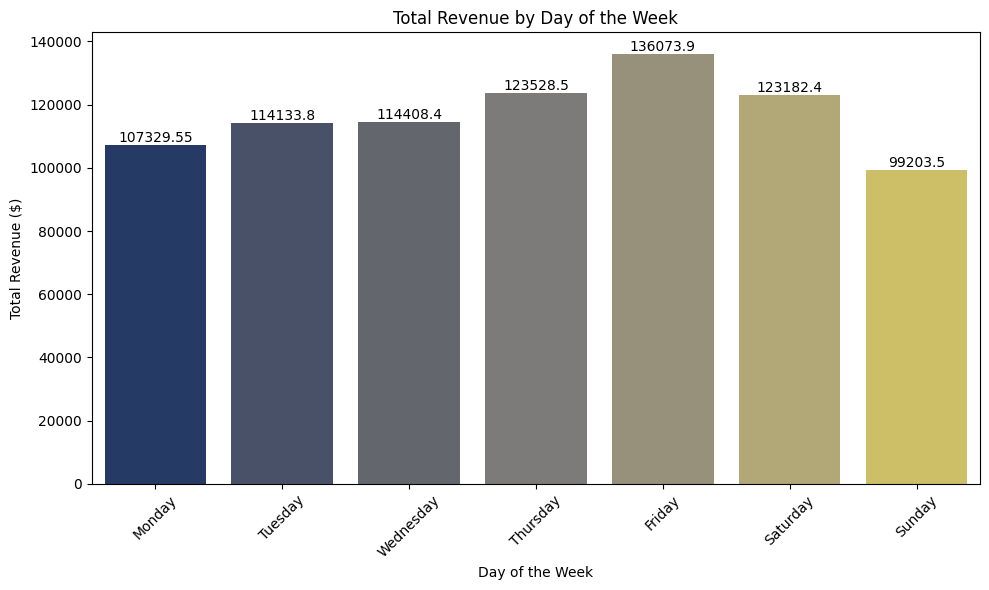

In [11]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['day_name'] = df['order_date'].dt.day_name()
weekdays_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_name'] = pd.Categorical(df['day_name'], categories=weekdays_ordered, ordered=True)

order_by_day = (
    df.groupby('day_name', observed=False)['total_price']
    .sum())

plt.figure(figsize=(10, 6))
sns.barplot(x=order_by_day.index, y=order_by_day.values, palette='cividis')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
for i, v in enumerate(order_by_day.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Hourly Trend

#### Total order

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\2365619024.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_by_hour.index, y=order_by_hour.values, palette='magma')


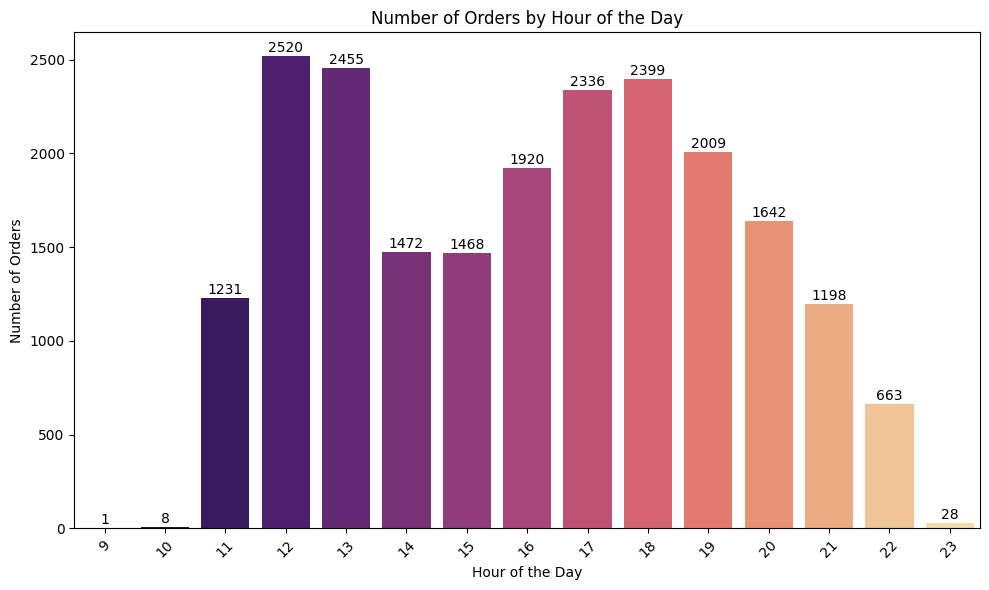

In [12]:
# extract hour from order_time (format HH:MM:SS) and compute unique orders by hour
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour

order_by_hour = (
    df.groupby('order_hour', observed=False)['order_id']
    .nunique())

plt.figure(figsize=(10, 6))
sns.barplot(x=order_by_hour.index, y=order_by_hour.values, palette='magma')
plt.title('Number of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
for i, v in enumerate(order_by_hour.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()

#### Total Revenue

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\2020944501.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_by_hour.index, y=order_by_hour.values, palette='plasma')


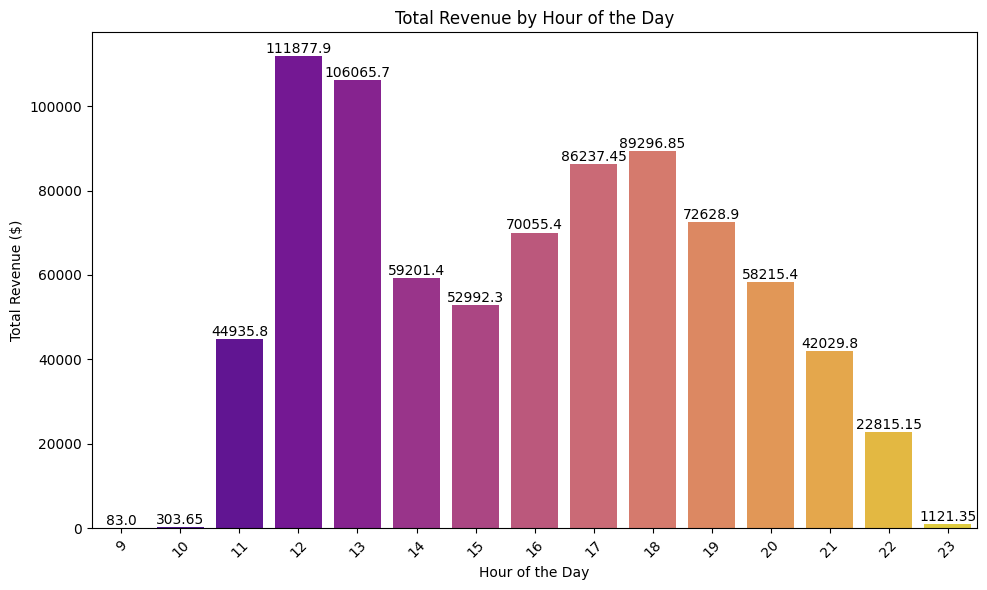

In [13]:
# extract hour from order_time (format HH:MM:SS) and compute unique orders by hour
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour

order_by_hour = (
    df.groupby('order_hour', observed=False)['total_price']
    .sum())

plt.figure(figsize=(10, 6))
sns.barplot(x=order_by_hour.index, y=order_by_hour.values, palette='plasma')
plt.title('Total Revenue by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue ($)')
for i, v in enumerate(order_by_hour.values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly Trend

#### Total orders

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\2366816152.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette='coolwarm')


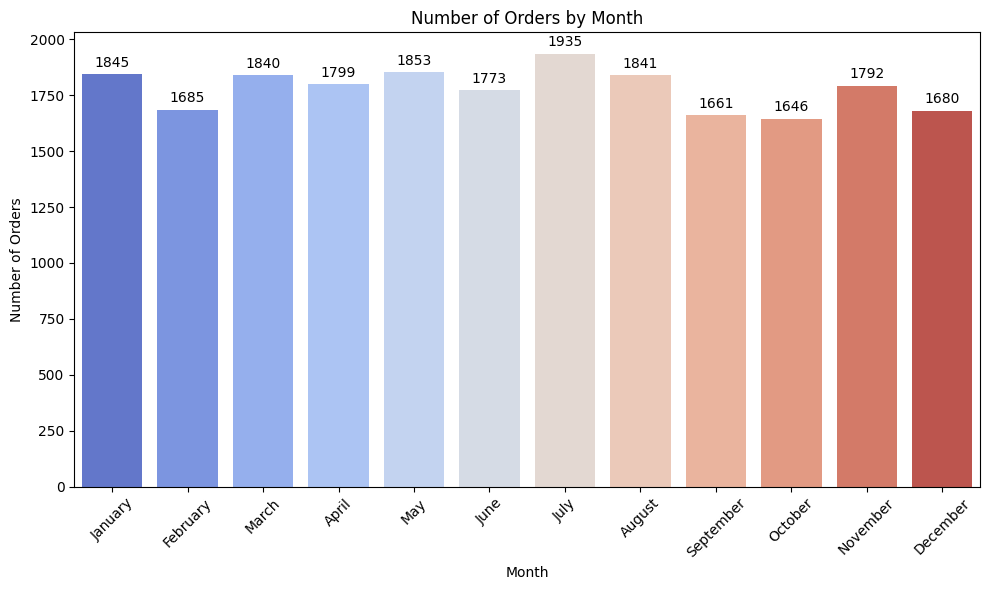

In [14]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['order_month'] = df['order_date'].dt.month_name()
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['order_month'] = pd.Categorical(df['order_month'], categories=months_ordered, ordered=True)

monthly_orders = (
    df.groupby('order_month', observed=False)['order_id']
    .nunique())

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette='coolwarm')
plt.title('Number of Orders by Month')      
plt.xlabel('Month')
plt.ylabel('Number of Orders')
for i, v in enumerate(monthly_orders.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Total Revenue

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\2584901977.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette='coolwarm')


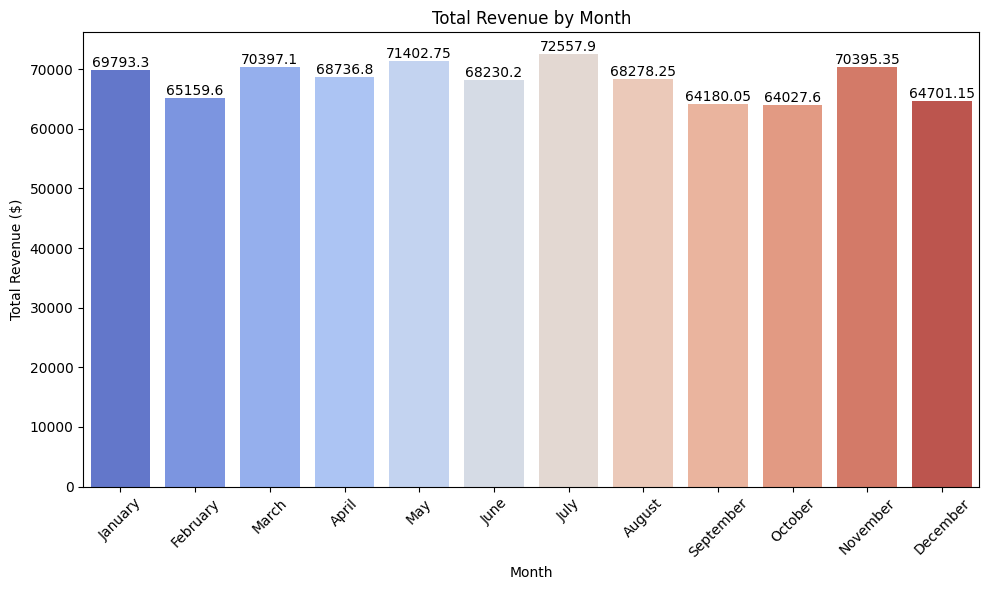

In [15]:
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True)
df['order_month'] = df['order_date'].dt.month_name()
months_ordered = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['order_month'] = pd.Categorical(df['order_month'], categories=months_ordered, ordered=True)

monthly_orders = (
    df.groupby('order_month', observed=False)['total_price']
    .sum())

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette='coolwarm')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
for i, v in enumerate(monthly_orders.values):
    plt.text(i, v + 20, str(v), ha='center', va='bottom')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### % of Sales by Category


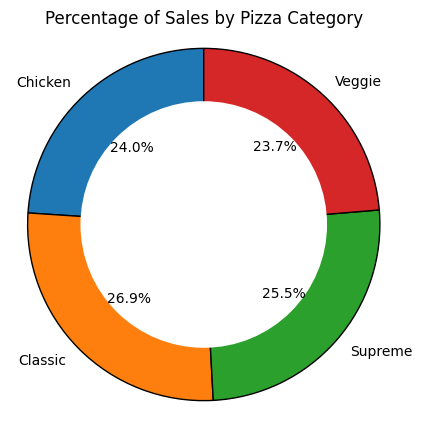

In [16]:
category_sales = (
    df.groupby('pizza_category', observed=False)['total_price']
    .sum())
category_sales_percentage = (category_sales / category_sales.sum()) * 100

# simple pie chart of percentage sales by category
plt.figure(figsize=(5, 5))
colors_to_use = colors if 'colors' in globals() else None

# matplotlib.pie in some environments doesn't support the 'width' kwarg.
# Remove 'width' and, if you want a donut chart, draw a white circle in the center.
plt.pie(
    category_sales_percentage,
    labels=category_sales_percentage.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_to_use,
    wedgeprops={'edgecolor': 'black'}
)

# create donut hole to mimic 'width' behavior (optional)
centre_circle = plt.Circle((0, 0), 0.70, fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Percentage of Sales by Pizza Category')
plt.axis('equal')
plt.show()


### % Sales by Pizza Size & Category

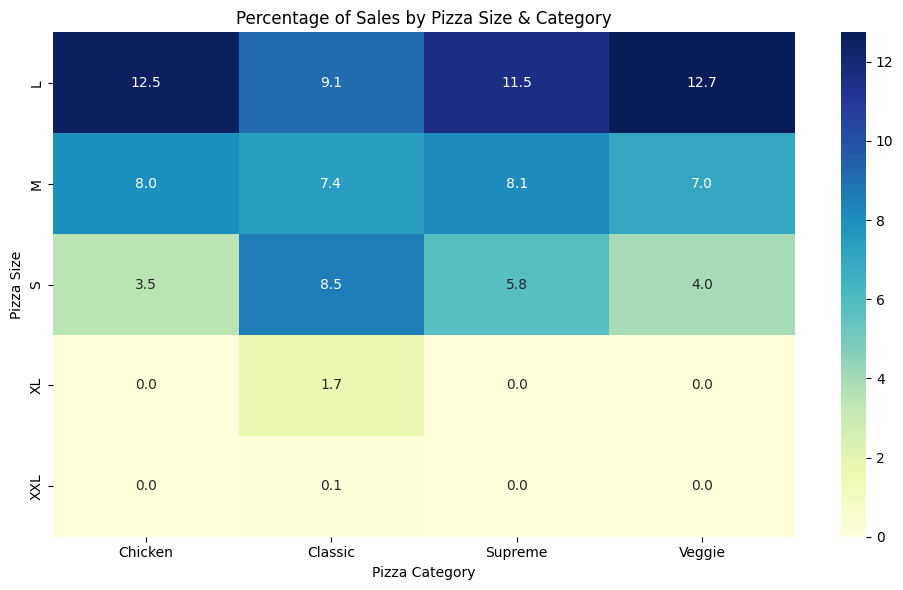

In [17]:
sales_povit = (
    df.pivot_table(
        index='pizza_size',
        columns='pizza_category',
        values='total_price',
        aggfunc='sum',
        fill_value=0
    )
)
sales_povit_percentage = sales_povit.div(sales_povit.sum().sum()).multiply(100)
plt.figure(figsize=(10, 6))
sns.heatmap(sales_povit_percentage, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Percentage of Sales by Pizza Size & Category')
plt.xlabel('Pizza Category')
plt.ylabel('Pizza Size')
plt.tight_layout()
plt.show()

###  Total Pizzas Sold by Pizza Category

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\364212679.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pizza_category.index, y=pizza_category.values, palette='Set2')


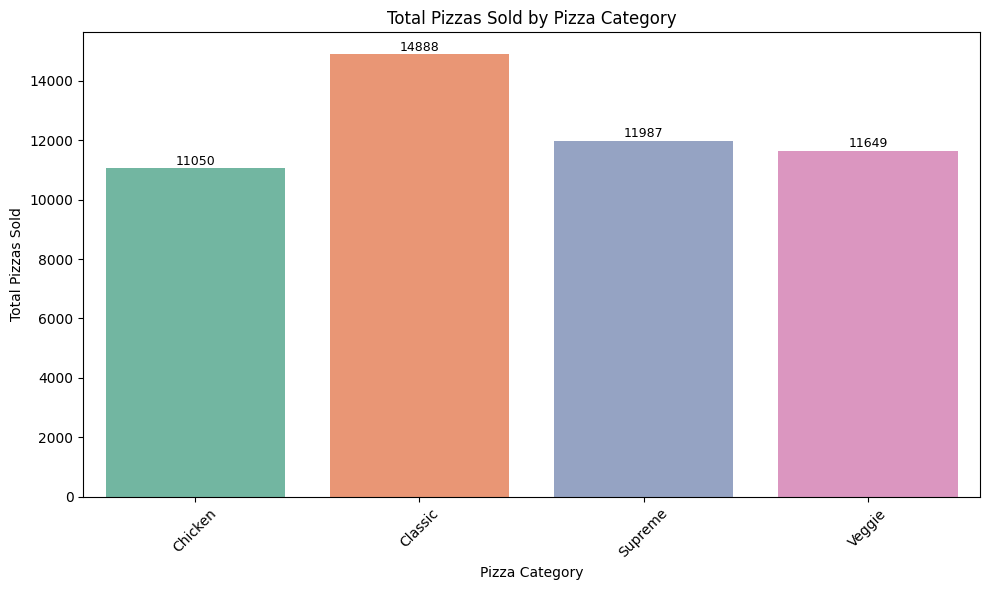

In [18]:
pizza_category = (
    df.groupby('pizza_category', observed=False)['quantity']
    .sum()
)

plt.figure(figsize=(10, 6))
sns.barplot(x=pizza_category.index, y=pizza_category.values, palette='Set2')
plt.title('Total Pizzas Sold by Pizza Category')
plt.xlabel('Pizza Category')
plt.ylabel('Total Pizzas Sold')
for i, v in enumerate(pizza_category.values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 Best-Selling Pizzas - Total Quantity

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\812147150.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.index, y=top_pizzas.values, palette='Spectral', edgecolor='black')


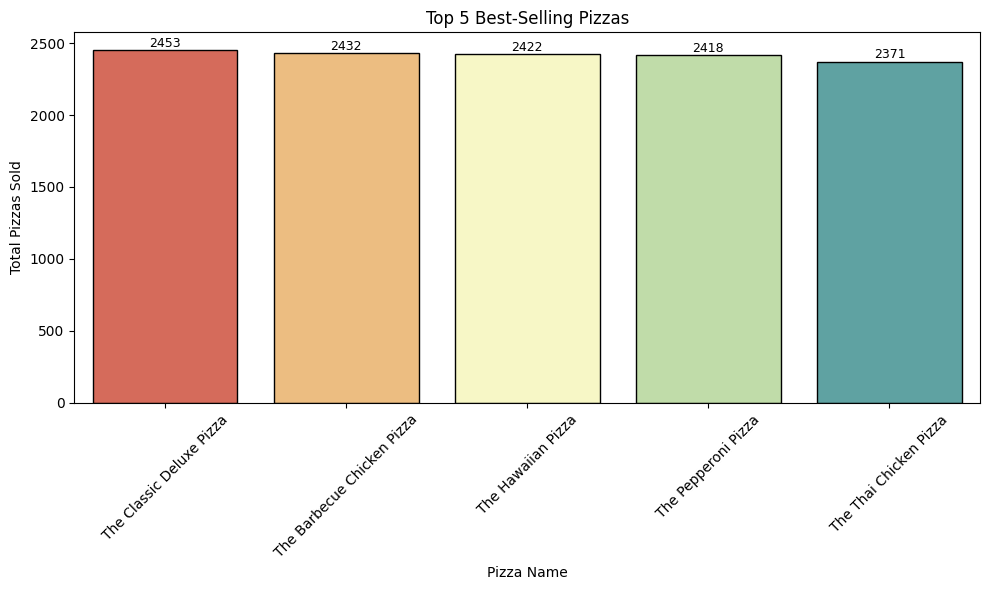

In [19]:
top_pizzas = (
    df.groupby('pizza_name', observed=False)['quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pizzas.index, y=top_pizzas.values, palette='Spectral', edgecolor='black')
plt.title('Top 5 Best-Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Pizzas Sold')
for i, v in enumerate(top_pizzas.values):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 Best-Selling Pizzas - Order

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\2958148142.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.index, y=top_pizzas.values, palette='Spectral', edgecolor='black')


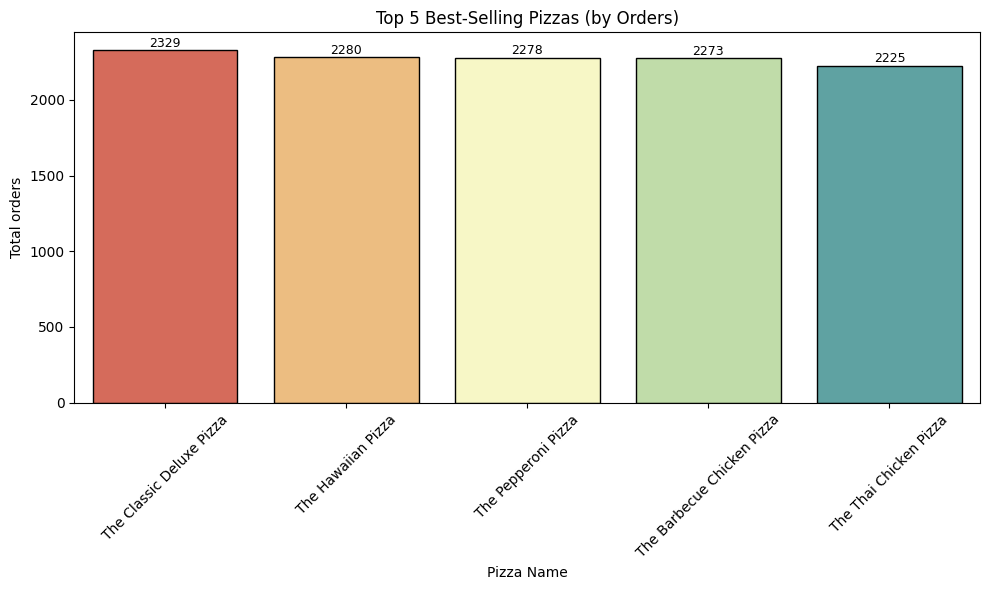

In [20]:
# count unique orders per pizza_name (number of orders containing that pizza)
top_pizzas = (
    df.groupby('pizza_name', observed=False)['order_id']
    .nunique()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pizzas.index, y=top_pizzas.values, palette='Spectral', edgecolor='black')
plt.title('Top 5 Best-Selling Pizzas (by Orders)')
plt.xlabel('Pizza Name')
plt.ylabel('Total orders')
for i, v in enumerate(top_pizzas.values):
    plt.text(i, v + 2, str(int(v)), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Top 5 Best-Selling Pizzas - Total Revenue

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\2826660963.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pizzas.index, y=top_pizzas.values, palette='Spectral', edgecolor='black')


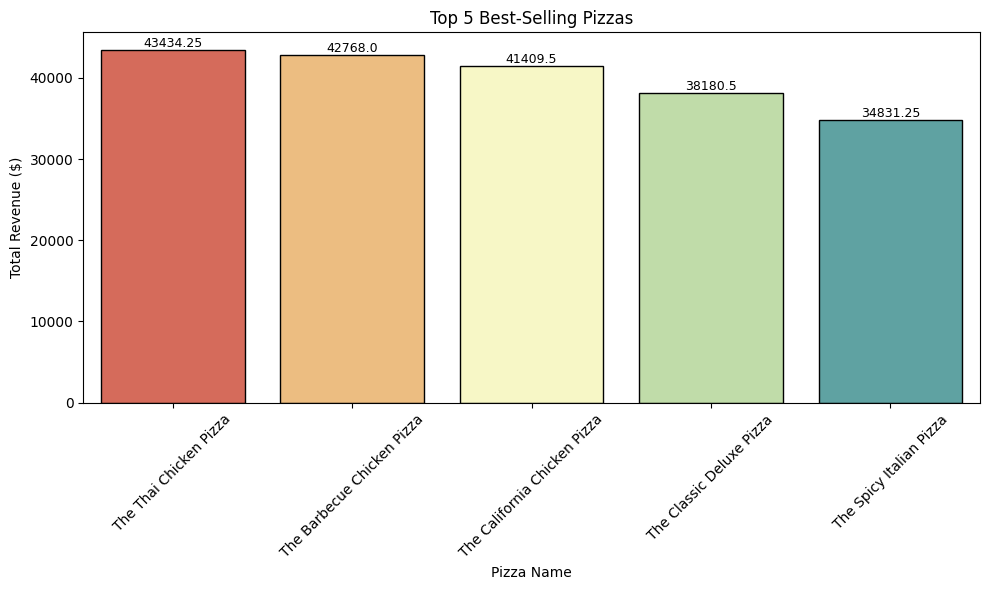

In [21]:
# count unique orders per pizza_name (number of orders containing that pizza)
top_pizzas = (
    df.groupby('pizza_name', observed=False)['total_price']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_pizzas.index, y=top_pizzas.values, palette='Spectral', edgecolor='black')
plt.title('Top 5 Best-Selling Pizzas')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue ($)')
for i, v in enumerate(top_pizzas.values):
    plt.text(i, v + 2, str(v), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()


### Top 5 bottom Pizzas - Quantity

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\1969403510.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_pizzas.index, y=bottom_pizzas.values, palette='Spectral', edgecolor='black')


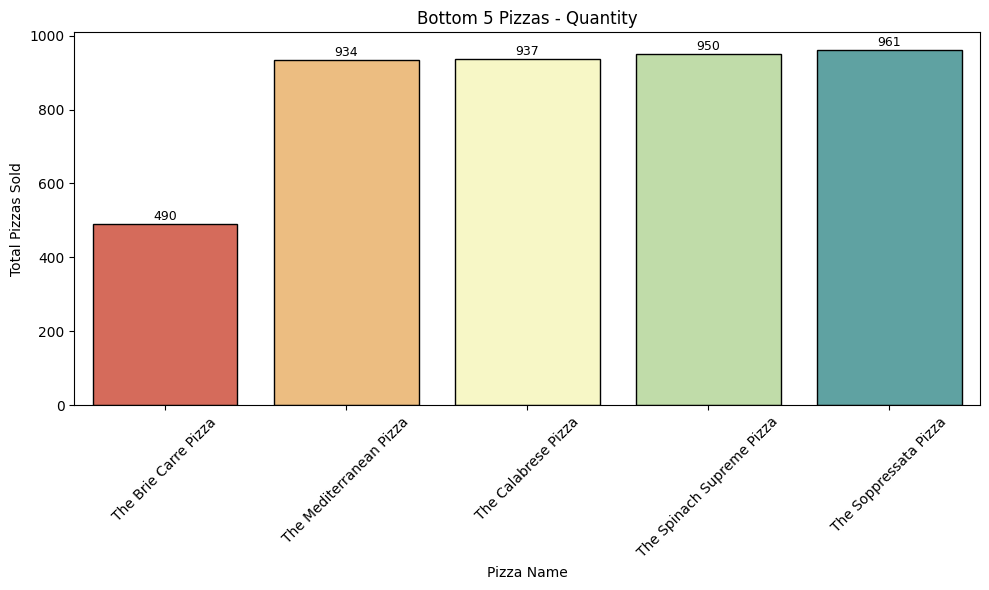

In [22]:
bottom_pizzas = (
    df.groupby('pizza_name', observed=False)['quantity']
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_pizzas.index, y=bottom_pizzas.values, palette='Spectral', edgecolor='black')
plt.title('Bottom 5 Pizzas - Quantity')
plt.xlabel('Pizza Name')
plt.ylabel('Total Pizzas Sold')
for i, v in enumerate(bottom_pizzas.values):
    plt.text(i, v + 2, str(int(v)), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 bottom Pizzas - Total  order

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\3611224248.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_pizzas.index, y=bottom_pizzas.values, palette='Spectral', edgecolor='black')


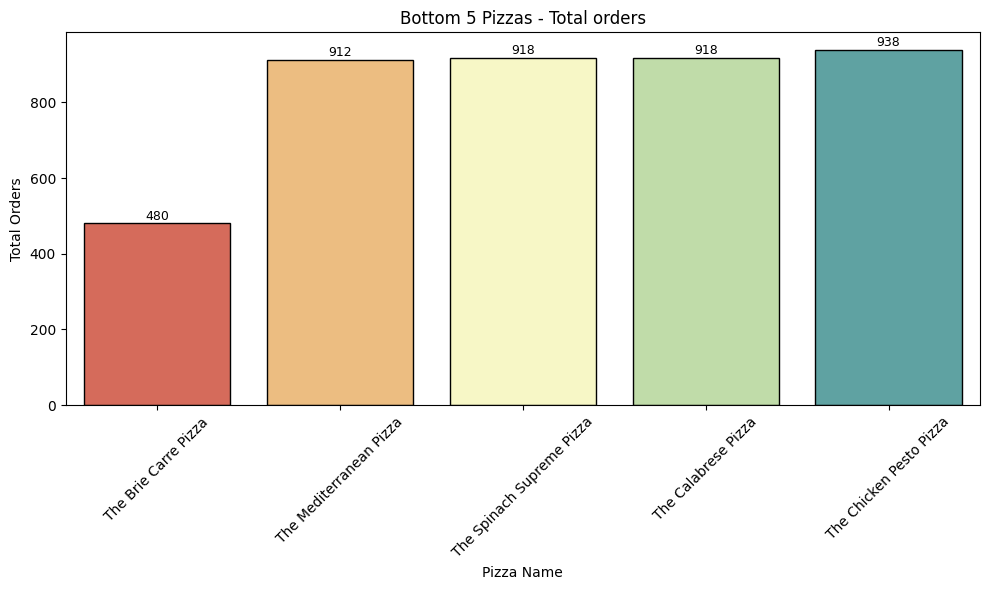

In [26]:
bottom_pizzas = (
    df.groupby('pizza_name', observed=False)['order_id']
    .nunique()
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_pizzas.index, y=bottom_pizzas.values, palette='Spectral', edgecolor='black')
plt.title('Bottom 5 Pizzas - Total orders')
plt.xlabel('Pizza Name')
plt.ylabel('Total Orders')
for i, v in enumerate(bottom_pizzas.values):
    plt.text(i, v + 2, str(int(v)), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Top 5 bottom Pizzas - Total Reveue

C:\Users\osama\AppData\Local\Temp\ipykernel_9212\1361406427.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bottom_pizzas.index, y=bottom_pizzas.values, palette='Spectral', edgecolor='black')


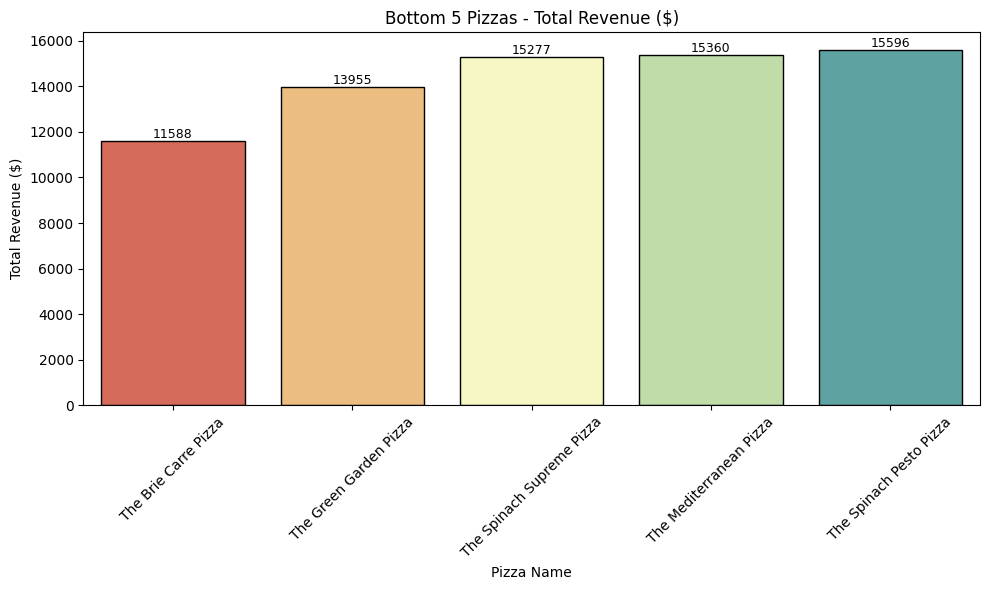

In [27]:
bottom_pizzas = (
    df.groupby('pizza_name', observed=False)['total_price']
    .sum()
    .sort_values(ascending=True)
    .head(5)
)

plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_pizzas.index, y=bottom_pizzas.values, palette='Spectral', edgecolor='black')
plt.title('Bottom 5 Pizzas - Total Revenue ($)')
plt.xlabel('Pizza Name')
plt.ylabel('Total Revenue ($)')
for i, v in enumerate(bottom_pizzas.values):
    plt.text(i, v + 2, str(int(v)), ha='center', va='bottom', fontsize=9)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()